In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/utc_working/medes/')

import os
os.chdir('/content/drive/My Drive/utc_working/medes/')

Mounted at /content/drive


In [2]:
!ls
!pip install -r requirements.txt

250_final_ml100k_user_context_criteria.csv  mha_model.py
427_final_ml1m_user_context_criteria.csv    ml-1m
427_ml1m_statistics_summary.csv		    ml1m_statistics_summary.csv
575_final_ml1m_user_context_criteria.csv    ml_processing.py
575_grouped_ml1m_context_criteria.csv	    mvl_110_plot.pdf
575_ml1m_statistics_summary.csv		    mvl_plot.pdf
average_time.pdf			    outputs
final_ml100k_user_context_criteria.csv	    __pycache__
final_ml1m_user_context_criteria.csv	    requirements.txt
grouped_ml1m_context_criteria.csv	    run.ipynb
imha_model.py				    run_movielen_100k.py
imt_110_plot.pdf			    run_mvdb.py
imt_plot.pdf				    run_mv.sh
ITM-Rec					    run.sh
main.py					    visualization.py
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.6 

model_name:  AutoInt
model_name:  DCN
model_name:  CCPM
model_name:  DIFM
model_name:  PNN
model_name:  IFM
model_name:  AFM
model_name:  LS-PLM
model_name:  DeepFM
model_name:  FiBiNET
model_name:  NFM
model_name:  ONN
model_name:  xDeepFM
model_name:  WDL
model_name:  MHA
dict_keys(['loss', 'mse', 'val_mse', 'RMSE', 'val_RMSE'])


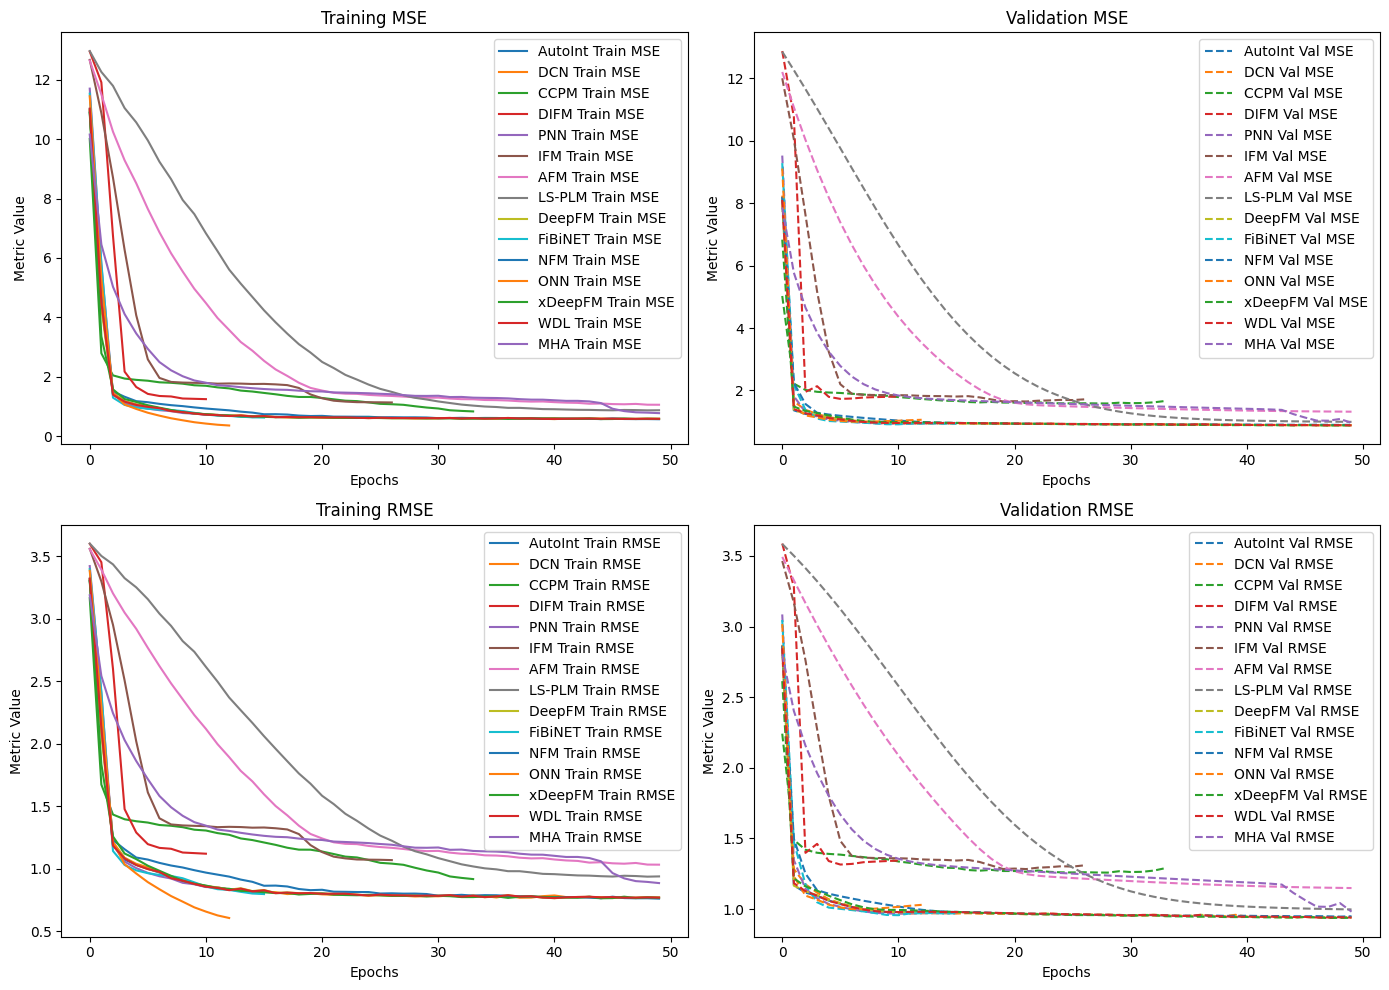

Plot saved as 'plot.pdf' successfully!


In [ ]:
import matplotlib.pyplot as plt
import pickle

# List of model names
model_names = ["AutoInt", "DCN", "CCPM", "DIFM", "PNN", "IFM", "AFM","LS-PLM","DeepFM","FiBiNET","NFM","ONN","xDeepFM","WDL", "MHA"]  # Add other models as necessary

# Dictionary to store loaded histories
histories = {}

# Load the histories for all models
for model_name in model_names:
    print("model_name: ", model_name)
    with open(f'./outputs/imt/{model_name}_imt_history.pkl', 'rb') as file_pi:
        histories[model_name] = pickle.load(file_pi)
print(histories[model_name].keys())  # See available keys

# Create a figure with 2 rows and 2 columns (for MAE and RMSE on train and validation)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Training and Validation MAE
for model_name in model_names:
    axs[0, 0].plot(histories[model_name]['mse'], label=f'{model_name} Train MSE')
    axs[0, 1].plot(histories[model_name]['val_mse'], label=f'{model_name} Val MSE', linestyle='--')

# Plot Training and Validation RMSE
for model_name in model_names:
    axs[1, 0].plot(histories[model_name]['RMSE'], label=f'{model_name} Train RMSE')
    axs[1, 1].plot(histories[model_name]['val_RMSE'], label=f'{model_name} Val RMSE', linestyle='--')

# Set titles for each subplot
axs[0, 0].set_title('Training MSE')
axs[0, 1].set_title('Validation MSE')
axs[1, 0].set_title('Training RMSE')
axs[1, 1].set_title('Validation RMSE')

# Set common labels
for ax in axs.flat:
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Metric Value')
    ax.legend()

# Adjust layout
plt.tight_layout()
# Save as PDF
plt.savefig("imt_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()
print("Plot saved as 'plot.pdf' successfully!")



Loading: AutoInt
Loading: DCN
Loading: CCPM
Loading: DIFM
Loading: PNN
Loading: IFM
Loading: AFM
Loading: LS-PLM
Loading: DeepFM
Loading: FiBiNET
Loading: NFM
Loading: ONN
Loading: xDeepFM
Loading: WDL
Loading: MHA


<ipython-input-18-1303cff45843>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(model_names))


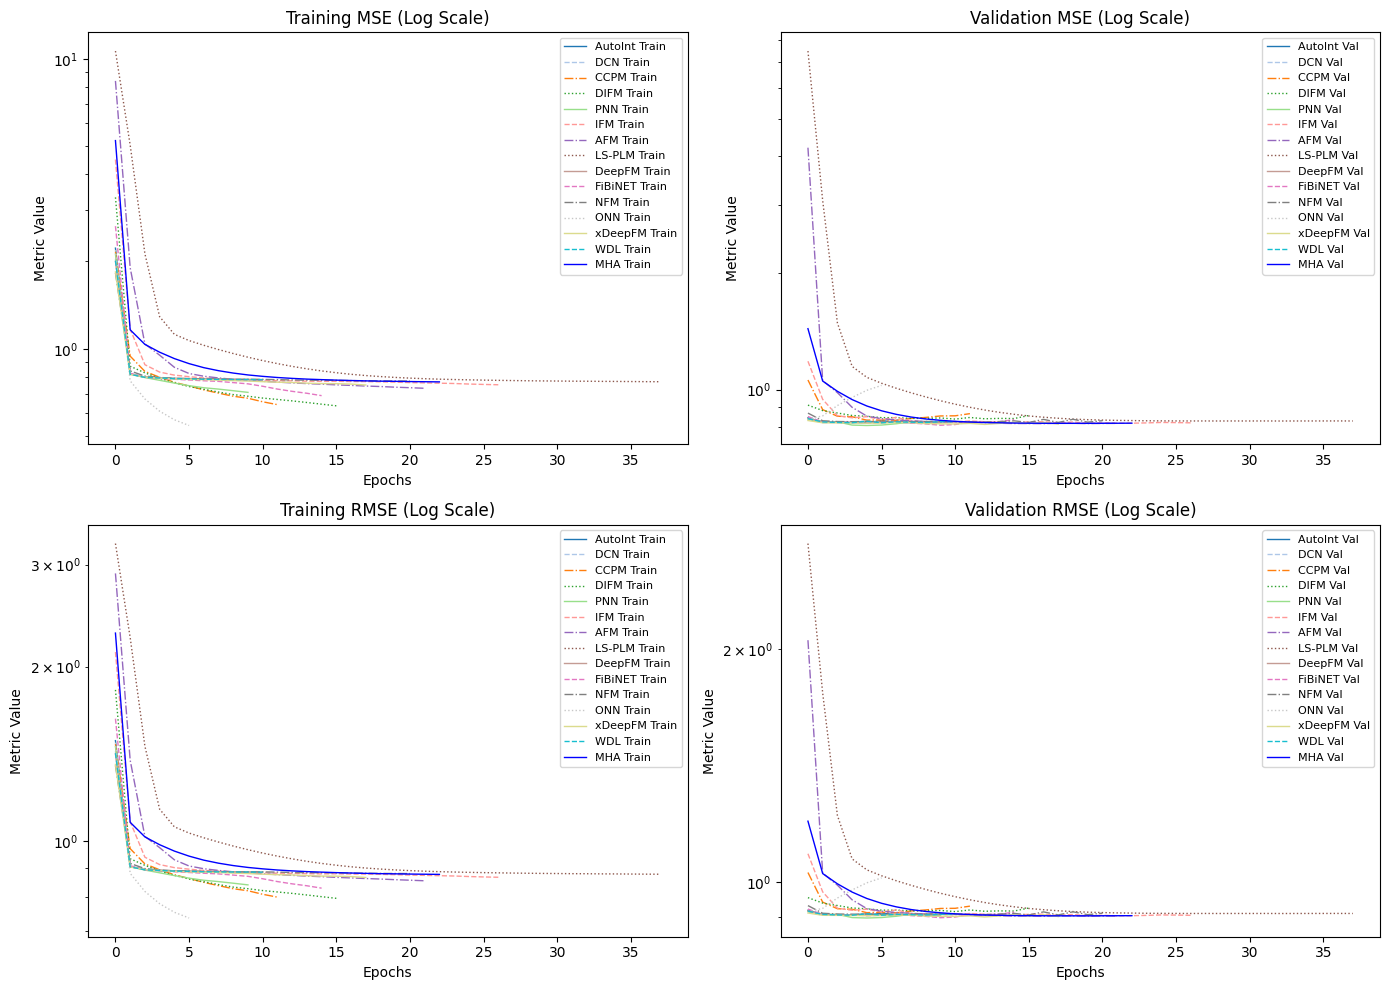

Plot saved as 'mvl_plot.pdf' successfully!


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import numpy as np

# List of model names
model_names = [
    "AutoInt", "DCN", "CCPM", "DIFM", "PNN", "IFM", "AFM",
    "LS-PLM", "DeepFM", "FiBiNET", "NFM", "ONN", "xDeepFM", "WDL", "MHA"
]

# Dictionary to store loaded histories
histories = {}

# Load the histories for all models
for model_name in model_names:
    print("Loading:", model_name)
    with open(f'./outputs/movilen-100k/{model_name}_mvl_history.pkl', 'rb') as file_pi:
        histories[model_name] = pickle.load(file_pi)

# Add small epsilon to avoid log(0)
epsilon = 1e-6
for model_name in model_names:
    for key in ['mse', 'val_mse', 'RMSE', 'val_RMSE']:
        histories[model_name][key] = [v + epsilon for v in histories[model_name][key]]

# Create a figure with 2 rows and 2 columns (for MSE and RMSE on train and validation)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Generate distinct colors for models (excluding MHA which is black)
cmap = cm.get_cmap('tab20', len(model_names))
linestyles = ['-', '--', '-.', ':']

# Plot Training and Validation MSE
for idx, model_name in enumerate(model_names):
    color = 'blue' if model_name == "MHA" else cmap(idx)
    lw = 1 if model_name == "MHA" else 1
    alpha = 1.0 if model_name == "MHA" else 1
    ls = '-' if model_name == "MHA" else linestyles[idx % len(linestyles)]

    axs[0, 0].plot(histories[model_name]['mse'], label=f'{model_name} Train', color=color, linewidth=lw, alpha=alpha, linestyle=ls)
    axs[0, 1].plot(histories[model_name]['val_mse'], label=f'{model_name} Val', color=color, linewidth=lw, alpha=alpha, linestyle=ls)

# Plot Training and Validation RMSE
for idx, model_name in enumerate(model_names):
    color = 'blue' if model_name == "MHA" else cmap(idx)
    lw = 1 if model_name == "MHA" else 1
    alpha = 1.0 if model_name == "MHA" else 1
    ls = '-' if model_name == "MHA" else linestyles[idx % len(linestyles)]

    axs[1, 0].plot(histories[model_name]['RMSE'], label=f'{model_name} Train', color=color, linewidth=lw, alpha=alpha, linestyle=ls)
    axs[1, 1].plot(histories[model_name]['val_RMSE'], label=f'{model_name} Val', color=color, linewidth=lw, alpha=alpha, linestyle=ls)

# Set titles
axs[0, 0].set_title('Training MSE (Log Scale)')
axs[0, 1].set_title('Validation MSE (Log Scale)')
axs[1, 0].set_title('Training RMSE (Log Scale)')
axs[1, 1].set_title('Validation RMSE (Log Scale)')

# Set log scale on y-axis and labels
for ax in axs.flat:
    ax.set_yscale('log')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Metric Value')
    ax.legend(fontsize=8)

# Adjust layout and save
plt.tight_layout()
plt.savefig("mvl_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

print("Plot saved as 'mvl_plot.pdf' successfully!")


Loading: AutoInt
Loading: DCN
Loading: CCPM
Loading: DIFM
Loading: PNN
Loading: IFM
Loading: AFM
Loading: LS-PLM
Loading: DeepFM
Loading: FiBiNET
Loading: NFM
Loading: ONN
Loading: xDeepFM
Loading: WDL
Loading: MHA


<ipython-input-21-6411aa773363>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(model_names))


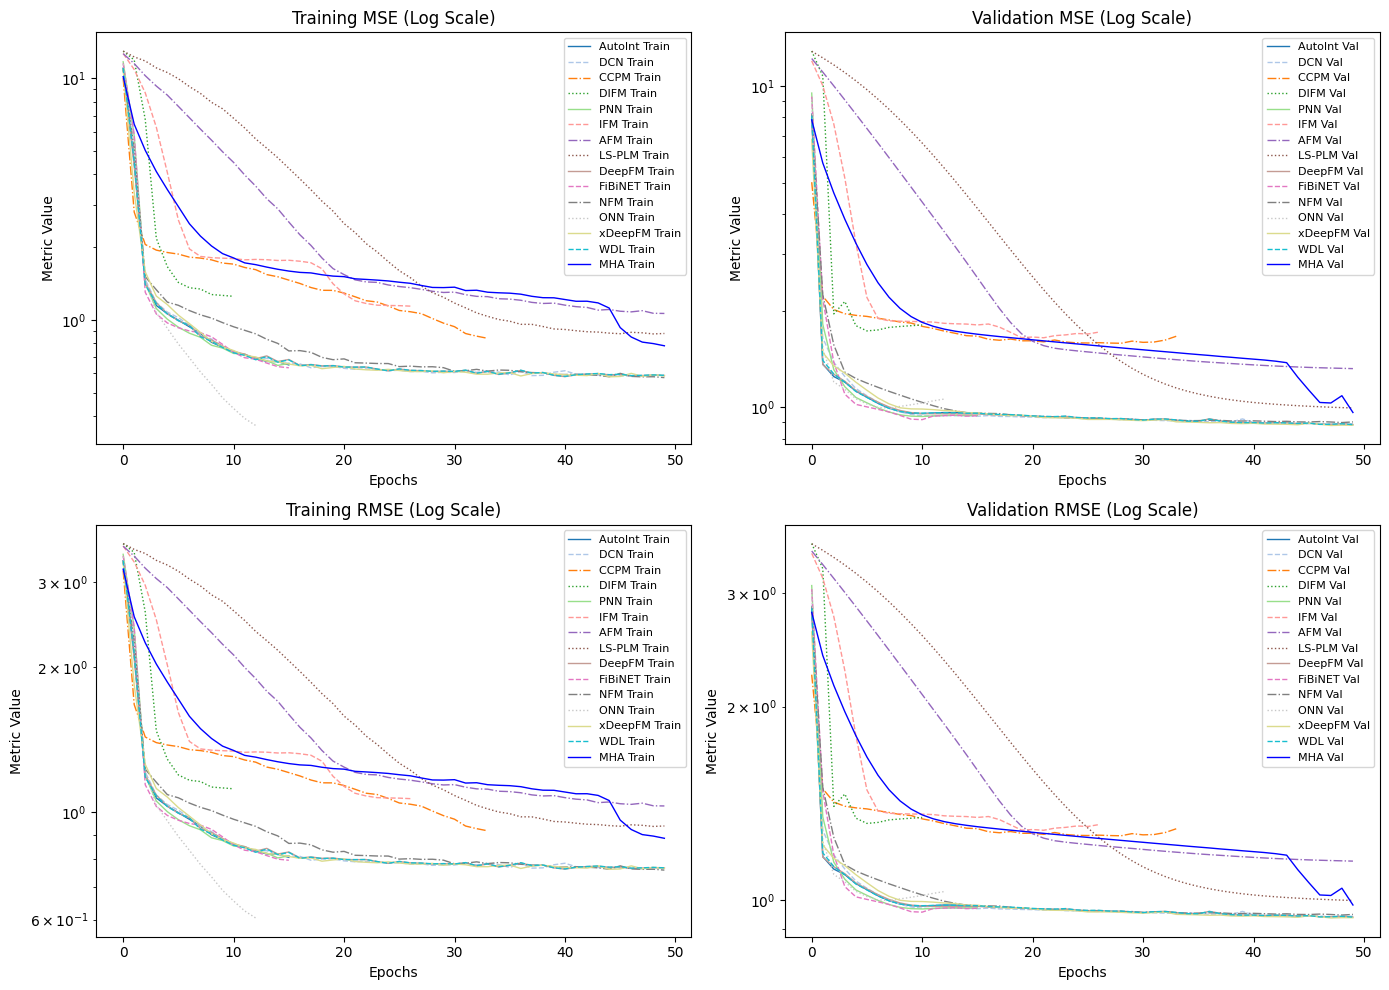

Plot saved as 'imt_plot.pdf' successfully!


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import numpy as np

# List of model names
model_names = [
    "AutoInt", "DCN", "CCPM", "DIFM", "PNN", "IFM", "AFM",
    "LS-PLM", "DeepFM", "FiBiNET", "NFM", "ONN", "xDeepFM", "WDL", "MHA"
]

# Dictionary to store loaded histories
histories = {}

# Load the histories for all models
for model_name in model_names:
    print("Loading:", model_name)
    with open(f'./outputs/imt/{model_name}_imt_history.pkl', 'rb') as file_pi:
        histories[model_name] = pickle.load(file_pi)

# Add small epsilon to avoid log(0)
epsilon = 1e-6
for model_name in model_names:
    for key in ['mse', 'val_mse', 'RMSE', 'val_RMSE']:
        histories[model_name][key] = [v + epsilon for v in histories[model_name][key]]

# Create a figure with 2 rows and 2 columns (for MSE and RMSE on train and validation)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Generate distinct colors for models (excluding MHA which is black)
cmap = cm.get_cmap('tab20', len(model_names))
linestyles = ['-', '--', '-.', ':']

# Plot Training and Validation MSE
for idx, model_name in enumerate(model_names):
    color = 'blue' if model_name == "MHA" else cmap(idx)
    lw = 1 if model_name == "MHA" else 1
    alpha = 1.0 if model_name == "MHA" else 1
    ls = '-' if model_name == "MHA" else linestyles[idx % len(linestyles)]

    axs[0, 0].plot(histories[model_name]['mse'], label=f'{model_name} Train', color=color, linewidth=lw, alpha=alpha, linestyle=ls)
    axs[0, 1].plot(histories[model_name]['val_mse'], label=f'{model_name} Val', color=color, linewidth=lw, alpha=alpha, linestyle=ls)

# Plot Training and Validation RMSE
for idx, model_name in enumerate(model_names):
    color = 'blue' if model_name == "MHA" else cmap(idx)
    lw = 1 if model_name == "MHA" else 1
    alpha = 1.0 if model_name == "MHA" else 1
    ls = '-' if model_name == "MHA" else linestyles[idx % len(linestyles)]

    axs[1, 0].plot(histories[model_name]['RMSE'], label=f'{model_name} Train', color=color, linewidth=lw, alpha=alpha, linestyle=ls)
    axs[1, 1].plot(histories[model_name]['val_RMSE'], label=f'{model_name} Val', color=color, linewidth=lw, alpha=alpha, linestyle=ls)

# Set titles
axs[0, 0].set_title('Training MSE (Log Scale)')
axs[0, 1].set_title('Validation MSE (Log Scale)')
axs[1, 0].set_title('Training RMSE (Log Scale)')
axs[1, 1].set_title('Validation RMSE (Log Scale)')

# Set log scale on y-axis and labels
for ax in axs.flat:
    ax.set_yscale('log')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Metric Value')
    ax.legend(fontsize=8)

# Adjust layout and save
plt.tight_layout()
plt.savefig("imt_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

print("Plot saved as 'imt_plot.pdf' successfully!")


Loading: AutoInt
Loading: DCN
Loading: CCPM
Loading: DIFM
Loading: PNN
Loading: IFM
Loading: AFM
Loading: LS-PLM
Loading: DeepFM
Loading: FiBiNET
Loading: NFM
Loading: ONN
Loading: xDeepFM
Loading: WDL
Loading: MHA


<ipython-input-8-b394858a4f24>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(model_names))


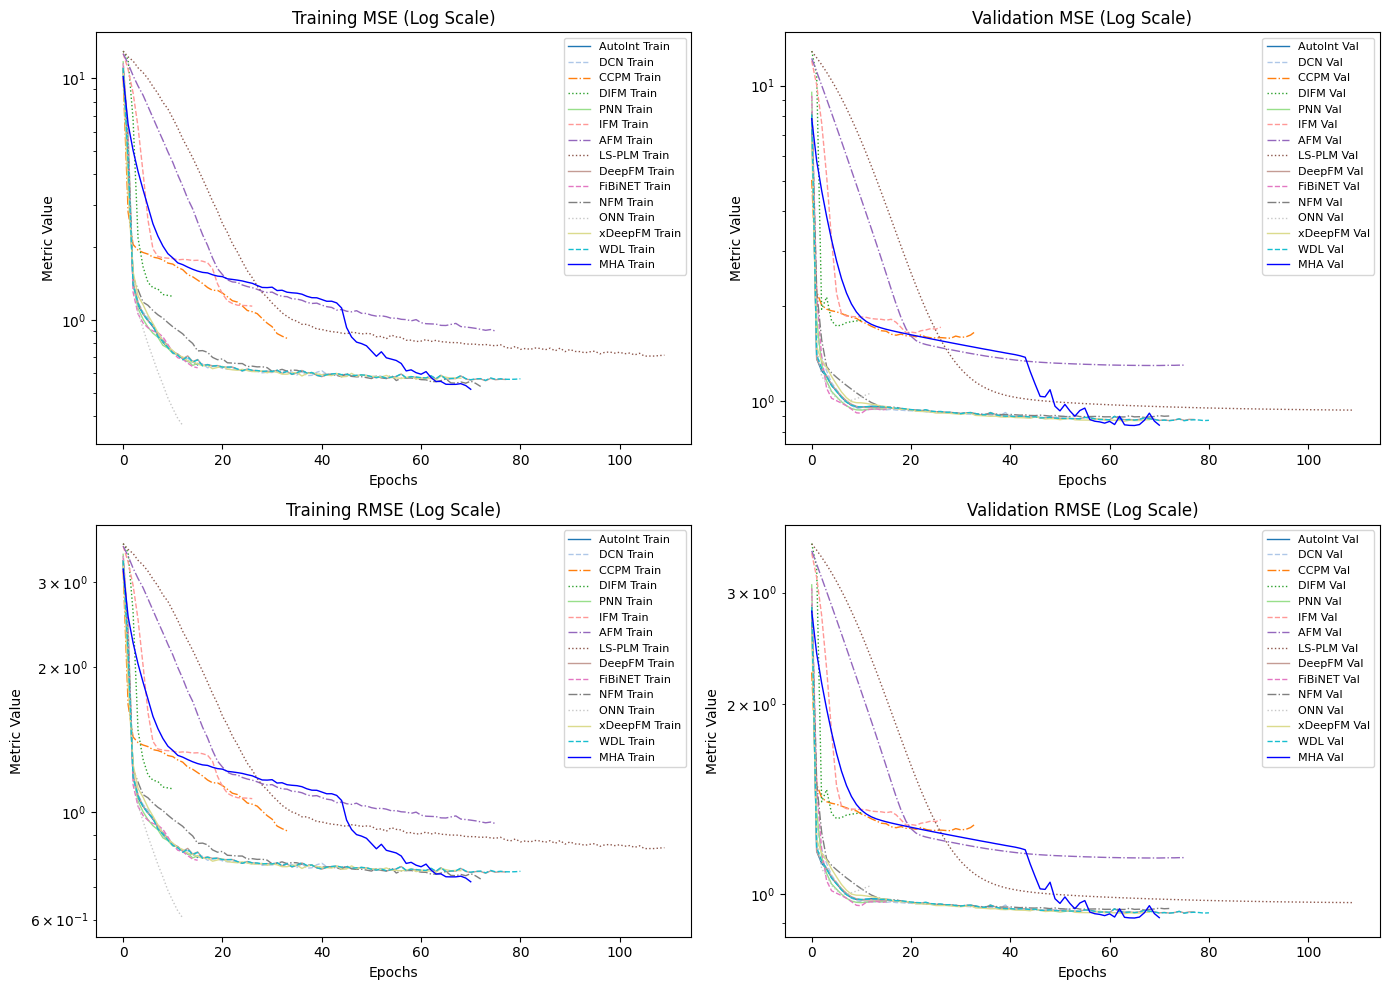

Plot saved as 'imt_plot.pdf' successfully!


In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import numpy as np

# List of model names
model_names = [
    "AutoInt", "DCN", "CCPM", "DIFM", "PNN", "IFM", "AFM",
    "LS-PLM", "DeepFM", "FiBiNET", "NFM", "ONN", "xDeepFM", "WDL", "MHA"
]

# Dictionary to store loaded histories
histories = {}

# Load the histories for all models
for model_name in model_names:
    print("Loading:", model_name)
    with open(f'./outputs/imt_110/{model_name}_imt_history.pkl', 'rb') as file_pi:
        histories[model_name] = pickle.load(file_pi)

# Add small epsilon to avoid log(0)
epsilon = 1e-6
for model_name in model_names:
    for key in ['mse', 'val_mse', 'RMSE', 'val_RMSE']:
        histories[model_name][key] = [v + epsilon for v in histories[model_name][key]]

# Create a figure with 2 rows and 2 columns (for MSE and RMSE on train and validation)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Generate distinct colors for models (excluding MHA which is black)
cmap = cm.get_cmap('tab20', len(model_names))
linestyles = ['-', '--', '-.', ':']

# Plot Training and Validation MSE
for idx, model_name in enumerate(model_names):
    color = 'blue' if model_name == "MHA" else cmap(idx)
    lw = 1 if model_name == "MHA" else 1
    alpha = 1.0 if model_name == "MHA" else 1
    ls = '-' if model_name == "MHA" else linestyles[idx % len(linestyles)]

    axs[0, 0].plot(histories[model_name]['mse'], label=f'{model_name} Train', color=color, linewidth=lw, alpha=alpha, linestyle=ls)
    axs[0, 1].plot(histories[model_name]['val_mse'], label=f'{model_name} Val', color=color, linewidth=lw, alpha=alpha, linestyle=ls)

# Plot Training and Validation RMSE
for idx, model_name in enumerate(model_names):
    color = 'blue' if model_name == "MHA" else cmap(idx)
    lw = 1 if model_name == "MHA" else 1
    alpha = 1.0 if model_name == "MHA" else 1
    ls = '-' if model_name == "MHA" else linestyles[idx % len(linestyles)]

    axs[1, 0].plot(histories[model_name]['RMSE'], label=f'{model_name} Train', color=color, linewidth=lw, alpha=alpha, linestyle=ls)
    axs[1, 1].plot(histories[model_name]['val_RMSE'], label=f'{model_name} Val', color=color, linewidth=lw, alpha=alpha, linestyle=ls)

# Set titles
axs[0, 0].set_title('Training MSE (Log Scale)')
axs[0, 1].set_title('Validation MSE (Log Scale)')
axs[1, 0].set_title('Training RMSE (Log Scale)')
axs[1, 1].set_title('Validation RMSE (Log Scale)')

# Set log scale on y-axis and labels
for ax in axs.flat:
    ax.set_yscale('log')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Metric Value')
    ax.legend(fontsize=8)

# Adjust layout and save
plt.tight_layout()
plt.savefig("imt_110_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

print("Plot saved as 'imt_plot.pdf' successfully!")


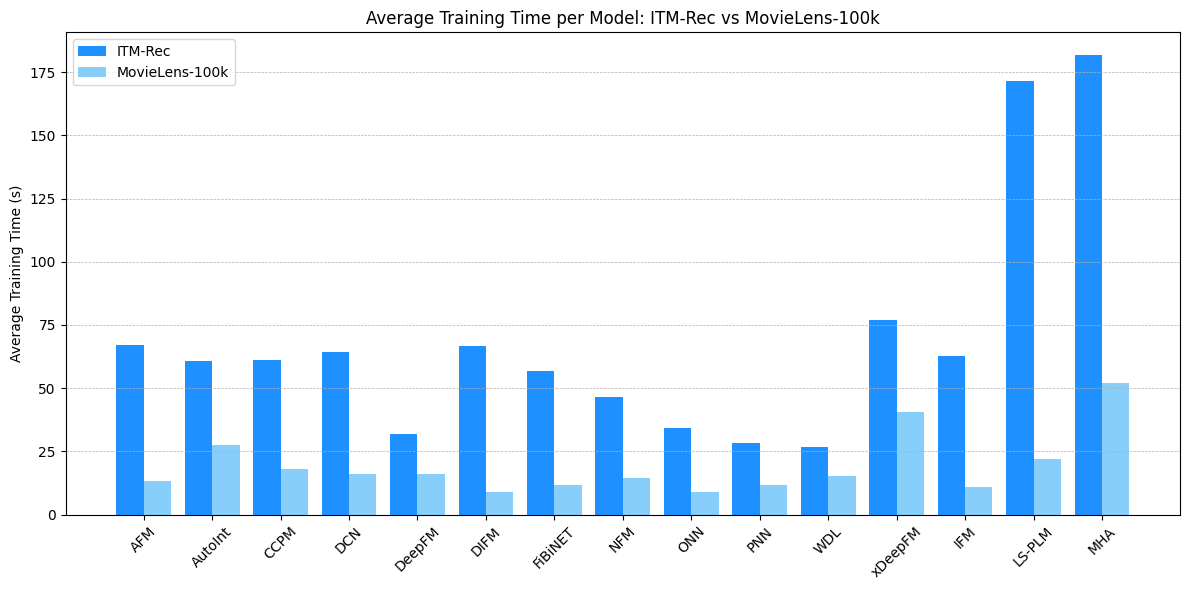

In [9]:
import matplotlib.pyplot as plt

# Define model names and average times for ITM-Rec and MovieLens-100k
models = ['AFM', 'AutoInt', 'CCPM', 'DCN', 'DeepFM', 'DIFM', 'FiBiNET', 'NFM',
          'ONN', 'PNN', 'WDL', 'xDeepFM', 'IFM', 'LS-PLM', 'MHA']

itm_rec_avg_times = [67.28, 60.73, 60.97, 64.12, 31.72, 66.62, 56.93, 46.46,
                     34.06, 28.24, 26.70, 77.06, 62.78, 171.52, 181.74]

movielens_avg_times = [13.43, 27.61, 18.01, 16.21, 16.12, 8.88, 11.65, 14.60,
                       9.05, 11.48, 15.22, 40.57, 10.78, 21.86, 52.06]

x = range(len(models))

# Plotting the column chart
plt.figure(figsize=(12, 6))
plt.bar(x, itm_rec_avg_times, width=0.4, label='ITM-Rec', color='dodgerblue', align='center')
plt.bar([i + 0.4 for i in x], movielens_avg_times, width=0.4, label='MovieLens-100k', color='lightskyblue', align='center')

plt.xticks([i + 0.2 for i in x], models, rotation=45)
plt.ylabel('Average Training Time (s)')
plt.title('Average Training Time per Model: ITM-Rec vs MovieLens-100k')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.show()


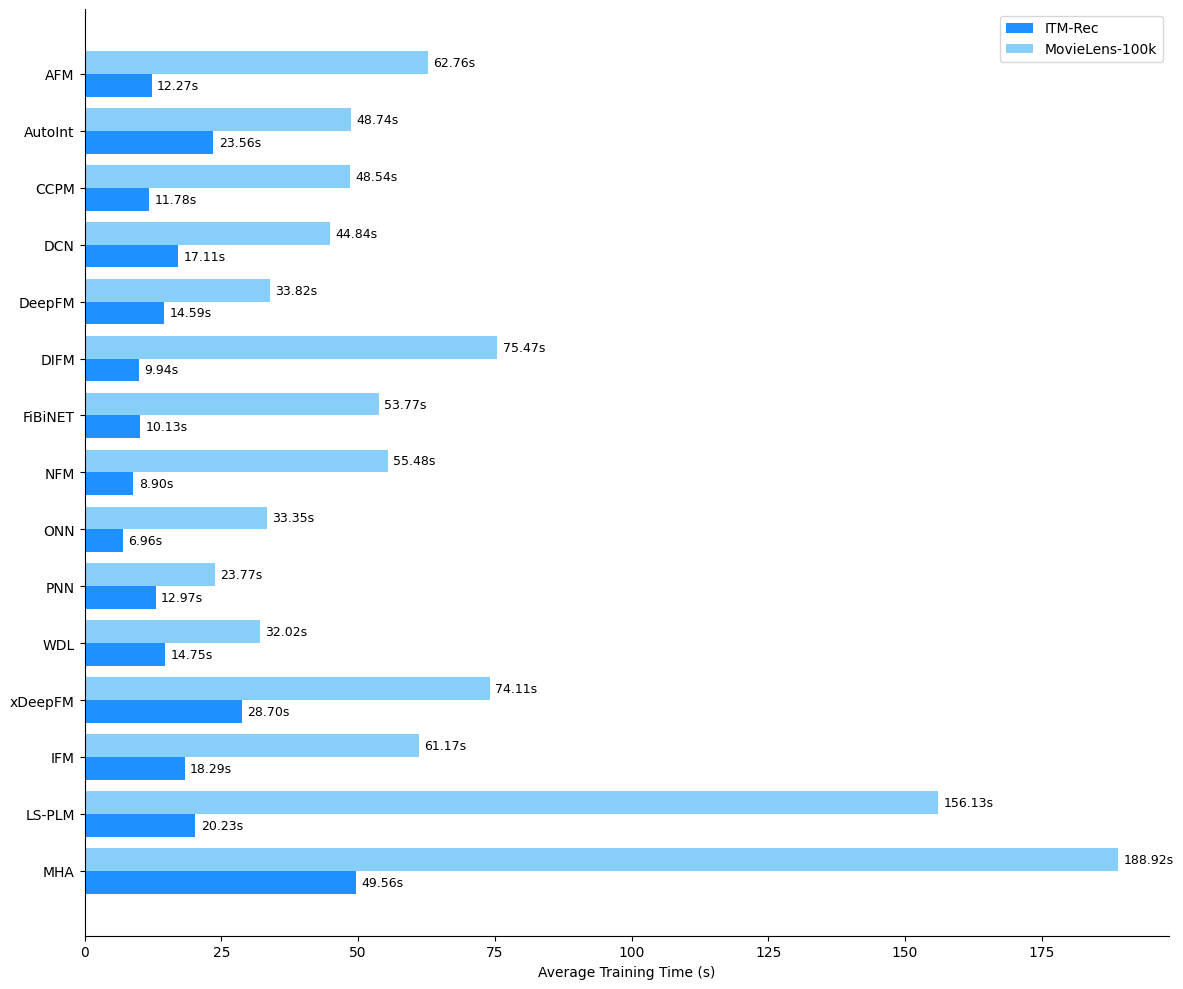

In [3]:
import pandas as pd

# Recreate the DataFrame from the previous context
data = {
    "Model": ["AFM", "AutoInt", "CCPM", "DCN", "DeepFM", "DIFM", "FiBiNET", "NFM", "ONN", "PNN",
              "WDL", "xDeepFM", "IFM", "LS-PLM", "MHA"],
    "MovieLens-100k": [62.76, 48.74, 48.54, 44.84, 33.82, 75.47, 53.77, 55.48, 33.35, 23.77,
                32.02, 74.11, 61.17, 156.13, 188.92],
    "ITM-Rec": [12.27, 23.56, 11.78, 17.11, 14.59, 9.94, 10.13, 8.90, 6.96, 12.97,
                       14.75, 28.70, 18.29, 20.23, 49.56]
}

avg_times_df = pd.DataFrame(data)

# Re-run the chart with updated context
import matplotlib.pyplot as plt

models = list(avg_times_df['Model'])
itm_rec_times = avg_times_df['ITM-Rec']
movielens_times = avg_times_df['MovieLens-100k']

fig, ax = plt.subplots(figsize=(12, 10))
bar_width = 0.4
y_pos = range(len(models))

bars1 = ax.barh([y + bar_width for y in y_pos], itm_rec_times, height=bar_width, label='ITM-Rec', color='dodgerblue')
bars2 = ax.barh(y_pos, movielens_times, height=bar_width, label='MovieLens-100k', color='lightskyblue')

# Add labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
                f'{bar.get_width():.2f}s', va='center', fontsize=9)

# Customize plot
ax.set_xlabel('Average Training Time (s)')
ax.set_yticks([y + bar_width / 2 for y in y_pos])
ax.set_yticklabels(models)
ax.invert_yaxis()  # Highest time at the bottom
ax.legend()

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("average_time.pdf", format="pdf", bbox_inches="tight")

plt.show()
